In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt

In [3]:
dataset = mnist.load_data()
(X_train, y_train), (X_test, y_test) = dataset

print("shape of X =", X_train.shape)
print("shape of y =", y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
shape of X = (60000, 28, 28)
shape of y = (60000,)


In [4]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [5]:
# Flatten the inputs
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert the target to one-hot encoding
number_of_classes = 10
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)


print("shape of X =", X_train.shape)
print("shape of y =", y_train.shape)

shape of X = (60000, 784)
shape of y = (60000, 10)


In [6]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

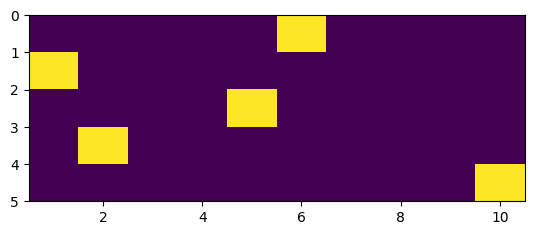

In [7]:
plt.imshow(y_train[:5], extent=[0.5, 10.5, y_train[:5].shape[0], 0], aspect=0.75)

In [8]:
# Define the model

In [9]:
model = Sequential()
model.add( Input(shape = (28*28,)) )
model.add( Dense(10, activation='sigmoid') ) #hidden layer
model.add( Dense(4, activation='sigmoid') ) #hidden layer
model.add( Dense(number_of_classes, activation='softmax') ) #output layer, activation must be softmax

In [10]:
# Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

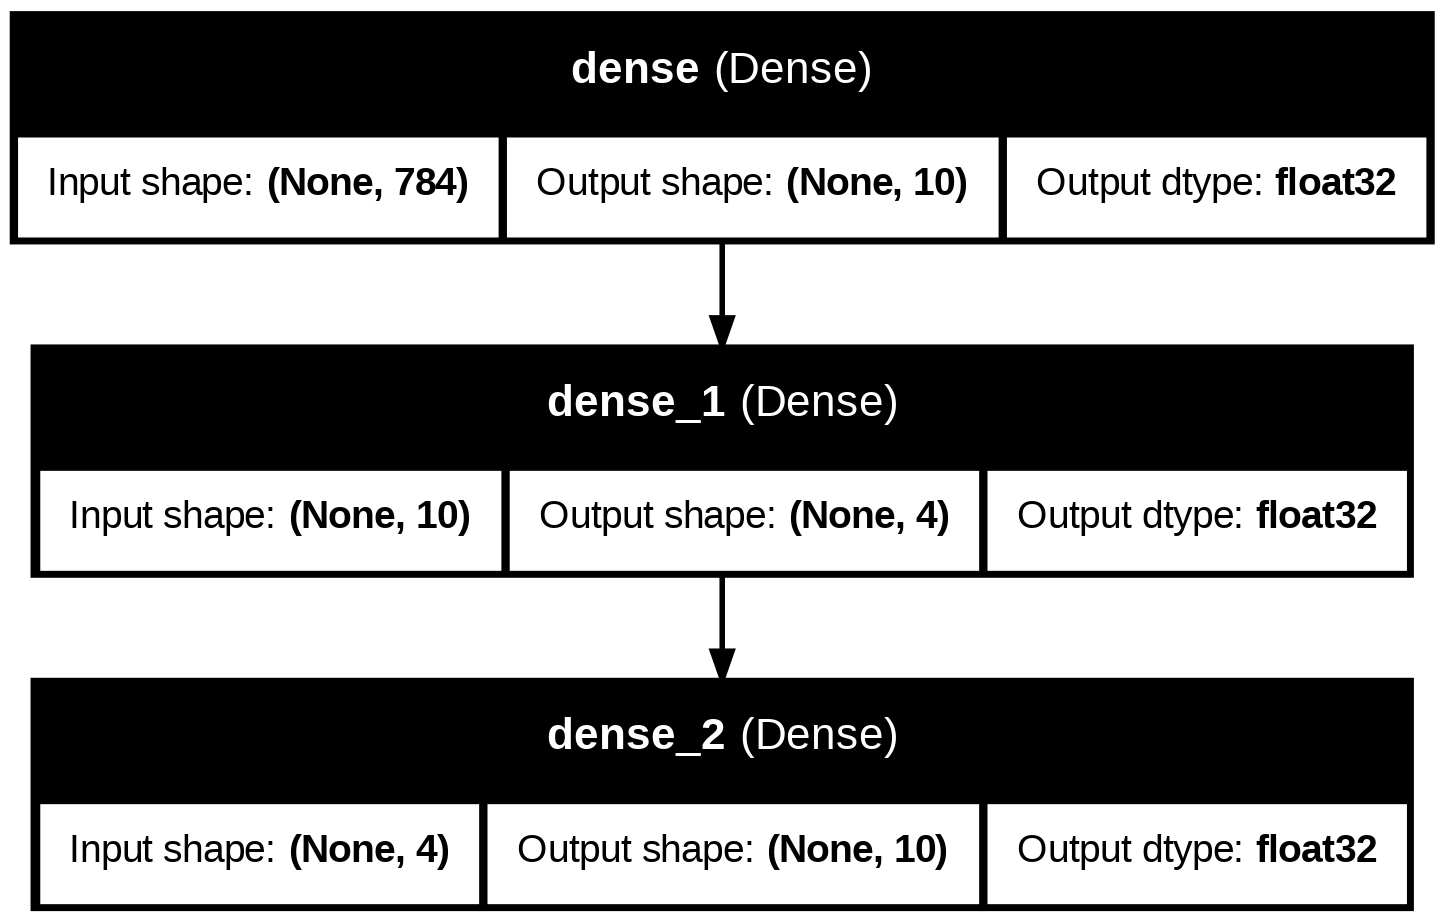

In [11]:
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [12]:
# Trainning the model
model.fit(X_train, y_train, epochs=25, verbose=1)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2013 - loss: 2.2105
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.3128 - loss: 1.9557
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4976 - loss: 1.7425
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5676 - loss: 1.5406
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5521 - loss: 1.3976
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5625 - loss: 1.2891
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5719 - loss: 1.2026
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5877 - loss: 1.1598
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5918 - loss: 1.1436
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5961 - loss: 1.0951
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6074 - loss: 1.0809
Epoch 12/25
1875/1875 ━━━━━━━━

In [13]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
y_pred.shape

(10000, 10)

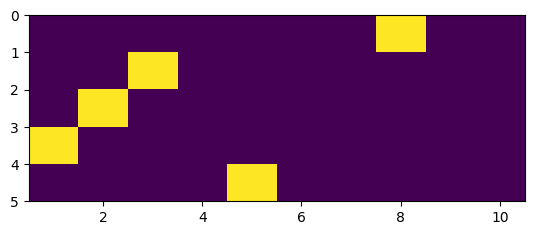

In [15]:
plt.imshow(y_test[:5], extent=[0.5, 10.5, y_test[:5].shape[0], 0], aspect=0.75)

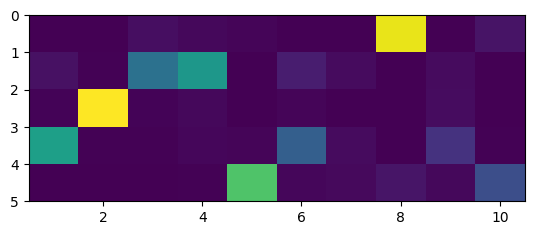

In [16]:
# y_pred[:5]
plt.imshow(y_pred[:5], extent=[0.5, 10.5, y_pred[:5].shape[0], 0], aspect=0.75)

In [17]:
import numpy as np
y_predicted = np.argmax(y_pred, axis=1)
y_predicted[:5]

array([7, 3, 1, 0, 4])

In [ ]:
# y_test

In [18]:
y_actual = np.argmax(y_test, axis=1)
print(y_actual[:5])

[7 2 1 0 4]


In [19]:
acc_testing = np.mean(y_actual == y_predicted)*100
print("Testing accuracy (%) =", acc_testing)

Testing accuracy (%) = 75.98


In [20]:
loss_test, pred_test = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7523 - loss: 0.8661


In [21]:
print("Testing accuracy (%) =", pred_test*100)

Testing accuracy (%) = 75.98000168800354


# Best model from keras-tuner library

In [22]:
# Best model so far
model = Sequential()
model.add( Input(shape = (784,)) )
model.add( Dense(20, activation='tanh') ) #hidden layer
model.add( Dense(20, activation='tanh') ) #hidden layer
model.add( Dense(20, activation='tanh') ) #hidden layer
model.add( Dense(10, activation='tanh') ) #hidden layer
model.add( Dense(number_of_classes, activation='softmax') ) #output layer, activation must be softmax

In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, verbose=1, epochs=25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5192 - loss: 1.5004
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7295 - loss: 0.8063
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7762 - loss: 0.6950
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8034 - loss: 0.6251
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8257 - loss: 0.5689
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8456 - loss: 0.5136
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8342 - loss: 0.5188
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8460 - loss: 0.4989
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8608 - loss: 0.4586
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8576 - loss: 0.4662
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8713 - loss: 0.4310
Epoch 12/25
1875/1875 ━━━━━━━━

In [25]:
loss, acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8818 - loss: 0.3848


In [26]:
print(acc*100)

89.2300009727478
